In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('/Users/admin/Desktop/PYTHON PROJECT/archive/all_indices_data.csv')  
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set 'date' column as index
data.set_index('date', inplace=True)


In [6]:
# Basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284000 entries, 1927-12-30 to 2023-08-21
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    284000 non-null  float64
 1   high    284000 non-null  float64
 2   low     284000 non-null  float64
 3   close   284000 non-null  float64
 4   volume  284000 non-null  float64
 5   ticker  284000 non-null  object 
dtypes: float64(5), object(1)
memory usage: 15.2+ MB
None
                open           high            low          close  \
count  284000.000000  284000.000000  284000.000000  284000.000000   
mean     7031.979178    7086.551639    6979.571052    7035.597185   
std     14519.005758   14701.185368   14378.514305   14558.687972   
min         0.000000       0.000000       0.000000       4.400000   
25%      1076.077484    1081.994263    1069.897522    1076.142517   
50%      2982.390015    3000.934937    2961.160561    2982.199951   
75%      7014.437866    7051.

In [7]:
# Summary statistics
print(data.describe())

                open           high            low          close  \
count  284000.000000  284000.000000  284000.000000  284000.000000   
mean     7031.979178    7086.551639    6979.571052    7035.597185   
std     14519.005758   14701.185368   14378.514305   14558.687972   
min         0.000000       0.000000       0.000000       4.400000   
25%      1076.077484    1081.994263    1069.897522    1076.142517   
50%      2982.390015    3000.934937    2961.160561    2982.199951   
75%      7014.437866    7051.000000    6969.600098    7013.675049   
max    582323.000000  585252.875000  567070.687500  584293.187500   

             volume  
count  2.840000e+05  
mean   3.725731e+08  
std    9.838429e+08  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.118350e+06  
75%    1.558000e+08  
max    1.162119e+10  


In [8]:
# Check for missing values
print(data.isnull().sum())


open      0
high      0
low       0
close     0
volume    0
ticker    0
dtype: int64


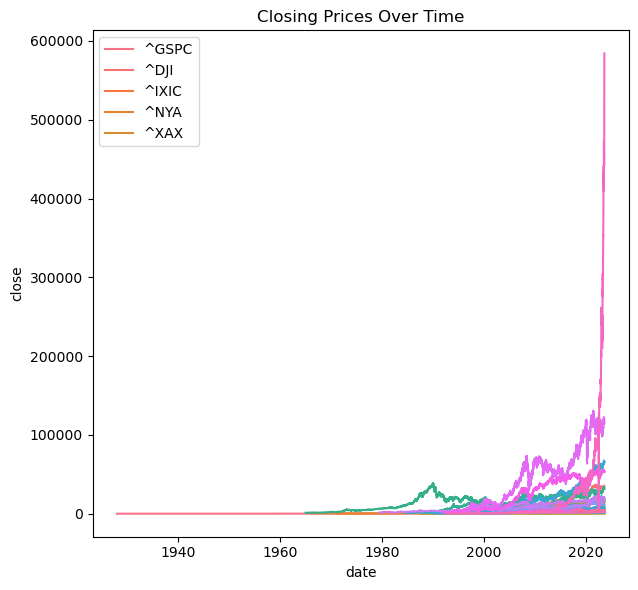

In [12]:

plt.figure(figsize=(12, 6))

# Line plot of closing prices over time
plt.subplot(1, 2, 1)
plot = sns.lineplot(data=data, x=data.index, y='close', hue='ticker')
plt.title('Closing Prices Over Time')

num_visible_tickers = 5  
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles[:num_visible_tickers], labels[:num_visible_tickers], loc='upper left')

plt.tight_layout()
plt.show()



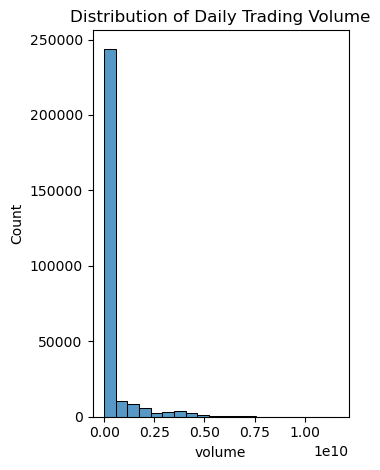

In [13]:
# Distribution of daily trading volume
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='volume', bins=20)
plt.title('Distribution of Daily Trading Volume')

plt.tight_layout()
plt.show()

/var/folders/51/twssnn_9195gd21hl80tzqy00000gn/T/ipykernel_1393/1535785379.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


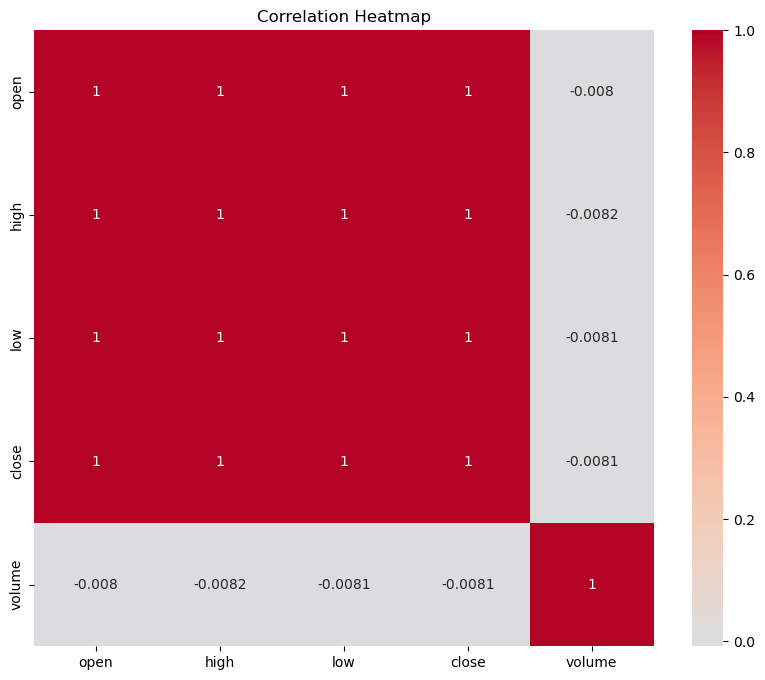

In [14]:
# Correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
# Find pairs with correlation close to 0
low_corr_pairs = []
threshold = 0.2  

for col1 in data['ticker'].unique():
    for col2 in data['ticker'].unique():
        if col1 != col2:
            corr = data[data['ticker'] == col1]['close'].corr(data[data['ticker'] == col2]['close'])
            if abs(corr) <= threshold:
                low_corr_pairs.append((col1, col2, corr))

# Display low correlation pairs
for pair in low_corr_pairs:
    print(f"Low Correlation Pair: {pair[0]} - {pair[1]} (Correlation: {pair[2]:.2f})")


Low Correlation Pair: ^GSPC - ^VIX (Correlation: -0.01)
Low Correlation Pair: ^DJI - ^VIX (Correlation: -0.01)
Low Correlation Pair: ^IXIC - ^VIX (Correlation: 0.01)
Low Correlation Pair: ^NYA - ^VIX (Correlation: -0.05)
Low Correlation Pair: ^BUK100P - 399001.SZ (Correlation: 0.06)
Low Correlation Pair: ^RUT - ^VIX (Correlation: -0.09)
Low Correlation Pair: ^VIX - ^GSPC (Correlation: -0.01)
Low Correlation Pair: ^VIX - ^DJI (Correlation: -0.01)
Low Correlation Pair: ^VIX - ^IXIC (Correlation: 0.01)
Low Correlation Pair: ^VIX - ^NYA (Correlation: -0.05)
Low Correlation Pair: ^VIX - ^RUT (Correlation: -0.09)
Low Correlation Pair: ^VIX - ^FTSE (Correlation: -0.07)
Low Correlation Pair: ^VIX - ^GDAXI (Correlation: -0.05)
Low Correlation Pair: ^VIX - ^FCHI (Correlation: 0.00)
Low Correlation Pair: ^VIX - ^BFX (Correlation: -0.06)
Low Correlation Pair: ^VIX - ^HSI (Correlation: -0.09)
Low Correlation Pair: ^VIX - 000001.SS (Correlation: -0.10)
Low Correlation Pair: ^VIX - 399001.SZ (Correla

In [19]:
# Import additional libraries
from itertools import combinations
from collections import defaultdict

# Define a simplified industry classification (for demonstration purposes)
industry_classification = {
    'AAPL': 'Technology',
    'MSFT': 'Technology',
    'GOOGL': 'Technology',
    'TSLA': 'Automotive',
    # ... Add more tickers and industries as needed
}

# Group tickers by industry/sector
industry_groups = defaultdict(list)
for ticker in data['ticker'].unique():
    industry = industry_classification.get(ticker, 'Unknown')
    industry_groups[industry].append(ticker)

# Find pairs with correlation close to 0
low_corr_pairs_by_industry = defaultdict(list)
threshold = 0.2  # You can adjust this threshold

for industry, tickers in industry_groups.items():
    for pair in combinations(tickers, 2):
        corr = data[data['ticker'] == pair[0]]['close'].corr(data[data['ticker'] == pair[1]]['close'])
        if abs(corr) <= threshold:
            low_corr_pairs_by_industry[industry].append((pair[0], pair[1], corr))

# Display low correlation pairs by industry
for industry, pairs in low_corr_pairs_by_industry.items():
    print(f"Industry: {industry}")
    for pair in pairs:
        print(f"Low Correlation Pair: {pair[0]} - {pair[1]} (Correlation: {pair[2]:.2f})")


Industry: Unknown
Low Correlation Pair: ^GSPC - ^VIX (Correlation: -0.01)
Low Correlation Pair: ^DJI - ^VIX (Correlation: -0.01)
Low Correlation Pair: ^IXIC - ^VIX (Correlation: 0.01)
Low Correlation Pair: ^NYA - ^VIX (Correlation: -0.05)
Low Correlation Pair: ^BUK100P - 399001.SZ (Correlation: 0.06)
Low Correlation Pair: ^RUT - ^VIX (Correlation: -0.09)
Low Correlation Pair: ^VIX - ^FTSE (Correlation: -0.07)
Low Correlation Pair: ^VIX - ^GDAXI (Correlation: -0.05)
Low Correlation Pair: ^VIX - ^FCHI (Correlation: 0.00)
Low Correlation Pair: ^VIX - ^BFX (Correlation: -0.06)
Low Correlation Pair: ^VIX - ^HSI (Correlation: -0.09)
Low Correlation Pair: ^VIX - 000001.SS (Correlation: -0.10)
Low Correlation Pair: ^VIX - 399001.SZ (Correlation: -0.05)
Low Correlation Pair: ^VIX - ^AXJO (Correlation: -0.07)
Low Correlation Pair: ^VIX - ^AORD (Correlation: -0.06)
Low Correlation Pair: ^VIX - ^BSESN (Correlation: -0.16)
Low Correlation Pair: ^VIX - ^JKSE (Correlation: -0.10)
Low Correlation Pair